In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

from sklearn import manifold, preprocessing, decomposition
import time

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
# PCA
from sklearn.decomposition import PCA 

## DataSet

In [2]:
url='https://raw.githubusercontent.com/DiploDatos/AprendizajeNOSupervisado/master/2021/data.csv'
df=pd.read_csv(url)

In [3]:
df.shape

(18207, 89)

In [19]:
n_sne=len(df) #elegir numero pequeño para agilidad en el cálculo luego

# reducimos le tamnio de la base de datos
df_sne=df.loc[:n_sne]


# creamos una lista con las features que nos interesa analizar
skills_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                  'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                  'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                  'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

# nos quedamos solo con las fetures seleccionadas
X=df_sne[skills_ratings]
print('dimensión del espacio de los datos: ', len(skills_ratings))

dimensión del espacio de los datos:  34


In [20]:
X.shape

(18207, 34)

In [21]:
X.sample(3)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
16982,39.0,29.0,41.0,65.0,28.0,40.0,45.0,46.0,59.0,50.0,62.0,63.0,67.0,49.0,56.0,53.0,58.0,72.0,70.0,35.0,53.0,46.0,45.0,48.0,43.0,37.0,56.0,51.0,43.0,7.0,10.0,9.0,13.0,11.0
16519,43.0,24.0,43.0,45.0,28.0,58.0,31.0,31.0,31.0,53.0,75.0,73.0,73.0,52.0,67.0,26.0,61.0,58.0,57.0,22.0,47.0,53.0,43.0,33.0,36.0,37.0,55.0,59.0,62.0,7.0,5.0,7.0,8.0,5.0
4366,65.0,60.0,74.0,62.0,58.0,64.0,75.0,78.0,71.0,63.0,46.0,38.0,66.0,63.0,61.0,81.0,88.0,64.0,88.0,76.0,88.0,63.0,50.0,56.0,73.0,78.0,61.0,71.0,65.0,15.0,13.0,16.0,9.0,15.0


In [25]:
X.isna().sum()

Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

In [27]:
X.dropna(inplace=True)
X.shape


(18159, 34)

## t-SNE

In [28]:
time_start = time.time()

# 1. Instanciamos la clase TSNE y definimos los hiperparámetros que queremos cambiar respecto de sus valores por defecto
tsne = manifold.TSNE(n_components=2,
                     verbose=1,
                     perplexity=30,
                     n_iter=1000)

X_tsne = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18159 samples in 0.001s...
[t-SNE] Computed neighbors for 18159 samples in 26.074s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18159
[t-SNE] Computed conditional probabilities for sample 2000 / 18159
[t-SNE] Computed conditional probabilities for sample 3000 / 18159
[t-SNE] Computed conditional probabilities for sample 4000 / 18159
[t-SNE] Computed conditional probabilities for sample 5000 / 18159
[t-SNE] Computed conditional probabilities for sample 6000 / 18159
[t-SNE] Computed conditional probabilities for sample 7000 / 18159
[t-SNE] Computed conditional probabilities for sample 8000 / 18159
[t-SNE] Computed conditional probabilities for sample 9000 / 18159
[t-SNE] Computed conditional probabilities for sample 10000 / 18159
[t-SNE] Computed conditional probabilities for sample 11000 / 18159
[t-SNE] Computed conditional probabilities for sample 12000 / 18159
[t-SNE] Computed conditional probabilities for sa

In [29]:
X_tsne[:5]

array([[ 33.41167 , -43.57449 ],
       [ 37.40447 , -42.51082 ],
       [ 33.36641 , -43.5067  ],
       [ 33.45915 ,  56.44514 ],
       [ -4.597044, -55.84546 ]], dtype=float32)

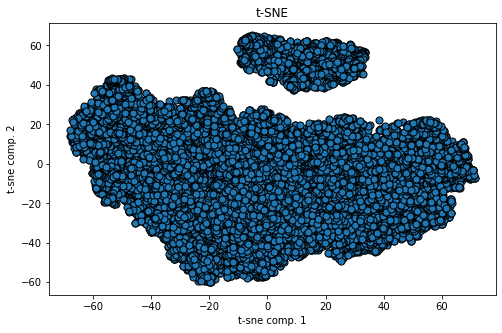

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(X_tsne[: , 0],X_tsne[: , 1],
            edgecolors = 'k',
            # c = clusters,
            s=50,            
            cmap='Set1'
            )


plt.title('t-SNE')
plt.xlabel('t-sne comp. 1')
plt.ylabel('t-sne comp. 2')
plt.show()

## PCA

In [31]:
# 1. Instanciamos la clase PCA y definimos el número de componentes hasta donde queremos reducir la dimensionalidad
pca = PCA(n_components=2, random_state=0)


# 2. Aplicamos la transformación
X_pca = pca.fit_transform(X)
X_pca[:5]

array([[-125.1953213 , -105.49006716],
       [-121.81976438,  -88.91556655],
       [-113.71178079,  -94.64353168],
       [ 166.7531689 ,  -25.0834515 ],
       [-133.33195523,  -35.44785972]])

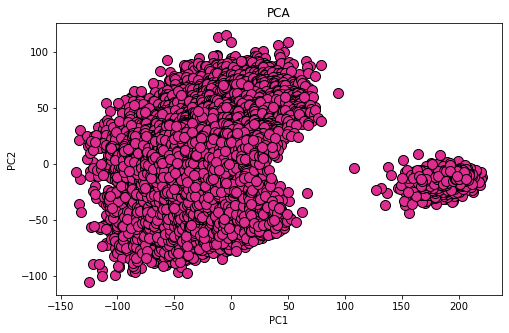

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[: , 0],X_pca[: , 1],
            edgecolors = 'k',
            s=100,            
            c='#de2c91'
            )
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Nota: Para que el análsisi de este dataset tenga relevancia, tenemos que tratar a los arqueros y a los jugadores de campo en dos análisi diferentes, porque de otra manera casi toda la variabilidad de las features se las lleva esa característca.

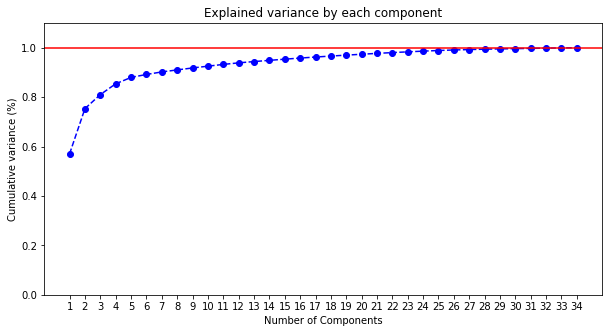

In [33]:
pca_var = PCA()
pca_var.fit(X)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
# plt.gca().xaxis.grid(False)

## Sin arqueros

In [ ]:
df_n=df_n[(df_n["Position"]!='GK')&(df_n['Overall']>70)]

In [35]:
# reducimos le tamnio de la base de datos
df_sne=df[(df["Position"]!='GK')]


# creamos una lista con las features que nos interesa analizar
skills_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                  'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                  'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                  'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

# nos quedamos solo con las fetures seleccionadas
X=df_sne[skills_ratings]
print('dimensión del espacio de los datos: ', len(skills_ratings))

dimensión del espacio de los datos:  34


In [36]:
X.shape

(16182, 34)

In [37]:
X.sample(3)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
17156,52.0,42.0,45.0,54.0,42.0,54.0,53.0,40.0,51.0,50.0,79.0,82.0,55.0,47.0,79.0,49.0,64.0,63.0,58.0,42.0,51.0,44.0,55.0,45.0,40.0,56.0,47.0,50.0,52.0,11.0,6.0,8.0,10.0,6.0
10272,64.0,28.0,64.0,67.0,22.0,50.0,40.0,21.0,60.0,61.0,37.0,38.0,34.0,65.0,42.0,56.0,30.0,68.0,86.0,32.0,59.0,70.0,32.0,26.0,41.0,57.0,73.0,69.0,66.0,8.0,5.0,12.0,8.0,6.0
16542,50.0,21.0,41.0,51.0,25.0,50.0,32.0,29.0,47.0,48.0,68.0,63.0,66.0,47.0,70.0,33.0,59.0,70.0,78.0,25.0,54.0,50.0,46.0,39.0,33.0,44.0,68.0,58.0,60.0,5.0,6.0,10.0,9.0,12.0


In [38]:
X.isna().sum()

Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

In [39]:
X.dropna(inplace=True)
X.shape


(16134, 34)

## t-SNE

In [40]:
time_start = time.time()

# 1. Instanciamos la clase TSNE y definimos los hiperparámetros que queremos cambiar respecto de sus valores por defecto
tsne = manifold.TSNE(n_components=2,
                     verbose=1,
                     perplexity=30,
                     n_iter=1000)

X_tsne = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16134 samples in 0.003s...
[t-SNE] Computed neighbors for 16134 samples in 11.597s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16134
[t-SNE] Computed conditional probabilities for sample 2000 / 16134
[t-SNE] Computed conditional probabilities for sample 3000 / 16134
[t-SNE] Computed conditional probabilities for sample 4000 / 16134
[t-SNE] Computed conditional probabilities for sample 5000 / 16134
[t-SNE] Computed conditional probabilities for sample 6000 / 16134
[t-SNE] Computed conditional probabilities for sample 7000 / 16134
[t-SNE] Computed conditional probabilities for sample 8000 / 16134
[t-SNE] Computed conditional probabilities for sample 9000 / 16134
[t-SNE] Computed conditional probabilities for sample 10000 / 16134
[t-SNE] Computed conditional probabilities for sample 11000 / 16134
[t-SNE] Computed conditional probabilities for sample 12000 / 16134
[t-SNE] Computed conditional probabilities for sa

In [41]:
X_tsne[:5]

array([[ -4.122182, -54.44951 ],
       [ -8.622261, -55.7503  ],
       [ -4.124697, -54.368576],
       [ 36.973946, -40.184105],
       [ -4.12353 , -54.318127]], dtype=float32)

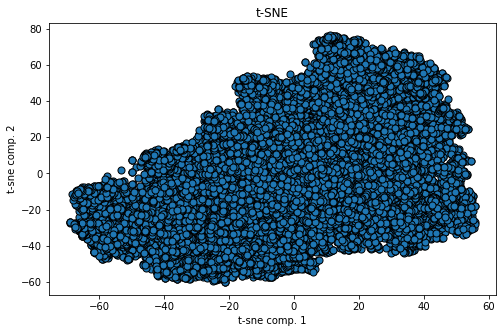

In [42]:
plt.figure(figsize=(8,5))
plt.scatter(X_tsne[: , 0],X_tsne[: , 1],
            edgecolors = 'k',
            # c = clusters,
            s=50,            
            cmap='Set1'
            )


plt.title('t-SNE')
plt.xlabel('t-sne comp. 1')
plt.ylabel('t-sne comp. 2')
plt.show()

## PCA

In [43]:
# 1. Instanciamos la clase PCA y definimos el número de componentes hasta donde queremos reducir la dimensionalidad
pca = PCA(n_components=2, random_state=0)


# 2. Aplicamos la transformación
X_pca = pca.fit_transform(X)
X_pca[:5]

array([[149.5564359 , -43.64011523],
       [132.30917445, -44.9965653 ],
       [133.77388488, -38.14697726],
       [ 96.71647908, -94.45789821],
       [129.29642588, -39.56486306]])

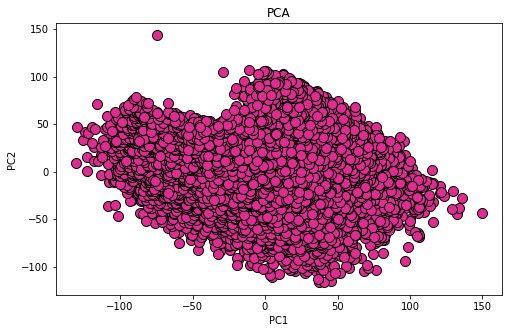

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[: , 0],X_pca[: , 1],
            edgecolors = 'k',
            s=100,            
            c='#de2c91'
            )
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

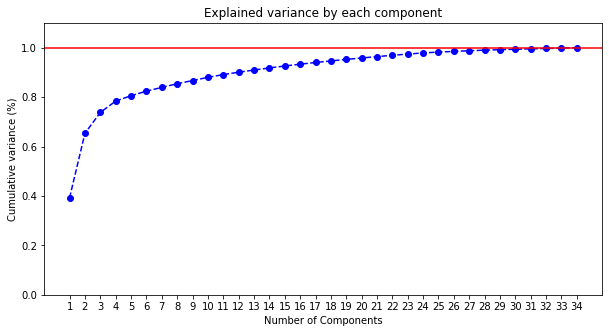

In [45]:
pca_var = PCA()
pca_var.fit(X)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
# plt.gca().xaxis.grid(False)